In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn
from numpy import mean
from numpy import std
from numpy import sqrt
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

In [486]:
df=pd.read_csv('../data/chirper-happiness.csv')

In [487]:
scaler=StandardScaler()
scaler=scaler.fit(df)
df=scaler.transform(df)
df=pd.DataFrame(df,columns=['Id2','totalGroup1','totalGroup2','percent_bachelorPlus','meanvalence','households_meanIncome'])

In [488]:
count=0
for i in range(len(df)):
    if df.iloc[i,4]<-.25:
        count+=1
print(count/len(df))

0.3909952606635071


In [489]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Id2,totalGroup1,totalGroup2,percent_bachelorPlus,meanvalence,households_meanIncome
Id2,1.000000,0.052407,0.025321,-0.049353,-0.078561,0.093286
totalGroup1,0.052407,1.000000,-0.503950,-0.729305,-0.361185,-0.507290
totalGroup2,0.025321,-0.503950,1.000000,0.726215,0.335692,0.585684
percent_bachelorPlus,-0.049353,-0.729305,0.726215,1.000000,0.457267,0.752844
meanvalence,-0.078561,-0.361185,0.335692,0.457267,1.000000,0.311013
households_meanIncome,0.093286,-0.507290,0.585684,0.752844,0.311013,1.000000


Text(0.5, 1.0, 'Bachelor % vs Mean Valence conditioned on Group1')

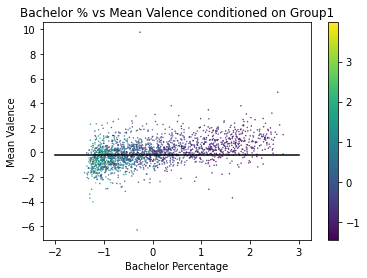

In [490]:
plt.scatter(df['percent_bachelorPlus'],df['meanvalence'],c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Mean Valence')
y=[-.25,-.25]
x=[-2,3]
plt.plot(x,y,c='black')
plt.title('Bachelor % vs Mean Valence conditioned on Group1')

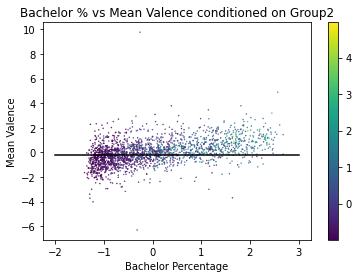

In [491]:
plt.scatter(df['percent_bachelorPlus'],df['meanvalence'],c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Mean Valence')
plt.title('Bachelor % vs Mean Valence conditioned on Group2')
y=[-.25,-.25]
x=[-2,3]
plt.plot(x,y,c='black')

In [492]:
print('Correlation:',pearsonr(df['percent_bachelorPlus'],df['meanvalence'])[0])

Correlation: 0.4572668075485824


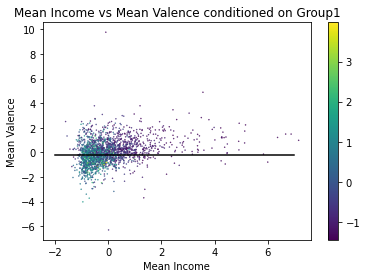

In [493]:
plt.scatter(df['households_meanIncome'],df['meanvalence'],c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Mean Valence')
plt.title('Mean Income vs Mean Valence conditioned on Group1')
y=[-.25,-.25]
x=[-2,7]
plt.plot(x,y,c='black')

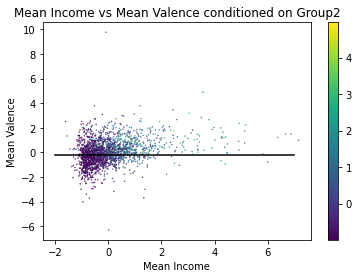

In [494]:
plt.scatter(df['households_meanIncome'],df['meanvalence'],c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Mean Valence')
plt.title('Mean Income vs Mean Valence conditioned on Group2')
y=[-.25,-.25]
x=[-2,7]
plt.plot(x,y,c='black')

In [495]:
print('Correlation:',pearsonr(df['households_meanIncome'],df['meanvalence'])[0])

Correlation: 0.31101314554208104


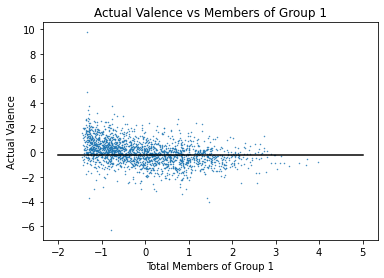

In [496]:
plt.scatter(df['totalGroup1'],df['meanvalence'],s=.2)
plt.title('Actual Valence vs Members of Group 1')
plt.ylabel('Actual Valence')
plt.xlabel('Total Members of Group 1')
y=[-.25,-.25]
x=[-2,5]
plt.plot(x,y,c='black')

In [497]:
print('Correlation:',pearsonr(df['totalGroup1'],df['meanvalence'])[0])

Correlation: -0.36118505558823394


Text(0.5, 0, 'Total Members of Group 2')

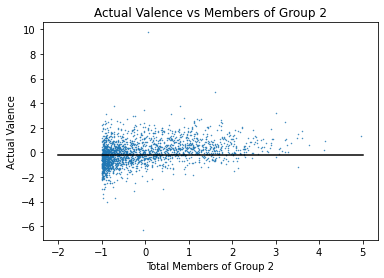

In [498]:
plt.scatter(df['totalGroup2'],df['meanvalence'],s=.2)
y=[-.25,-.25]
x=[-2,5]
plt.plot(x,y,c='black')
plt.title('Actual Valence vs Members of Group 2')
plt.ylabel('Actual Valence')
plt.xlabel('Total Members of Group 2')

In [499]:
print('Correlation:',pearsonr(df['totalGroup2'],df['meanvalence'])[0])

Correlation: 0.3356921044358605


In [500]:
X=df[['totalGroup1','totalGroup2','percent_bachelorPlus','households_meanIncome']]
Y=df['meanvalence']

In [501]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=1234)
X_sm=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_sm)
results=model.fit()
print(results.summary())
X_sm=sm.add_constant(X)
preds=results.predict(X_sm)

                            OLS Regression Results                            
Dep. Variable:            meanvalence   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     112.4
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           5.55e-85
Time:                        16:49:59   Log-Likelihood:                -2193.2
No. Observations:                1688   AIC:                             4396.
Df Residuals:                    1683   BIC:                             4424.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

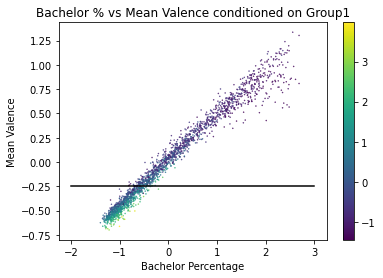

In [502]:
plt.scatter(df['percent_bachelorPlus'],preds,c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Mean Valence')
plt.title('Bachelor % vs Mean Valence conditioned on Group1')
y=[-.25,-.25]
x=[-2,3]
plt.plot(x,y,c='black')

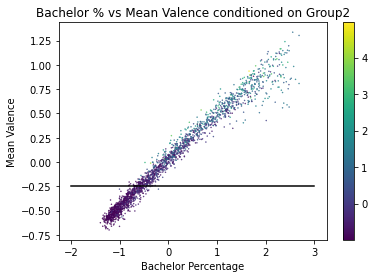

In [503]:
plt.scatter(df['percent_bachelorPlus'],preds,c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Mean Valence')
plt.title('Bachelor % vs Mean Valence conditioned on Group2')
y=[-.25,-.25]
x=[-2,3]
plt.plot(x,y,c='black')

In [504]:
print('Correlation:',pearsonr(df['percent_bachelorPlus'],preds)[0])

Correlation: 0.9861781660110602


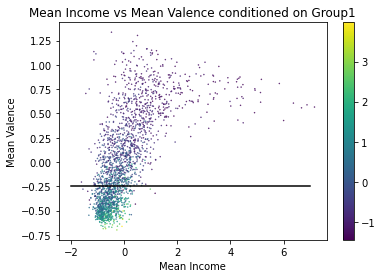

In [505]:
plt.scatter(df['households_meanIncome'],preds,c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Mean Valence')
plt.title('Mean Income vs Mean Valence conditioned on Group1')
y=[-.25,-.25]
x=[-2,7]
plt.plot(x,y,c='black')

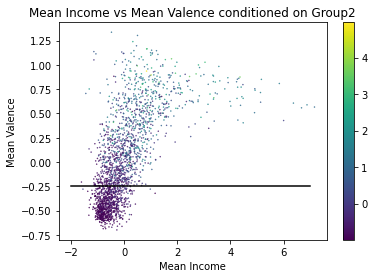

In [506]:
plt.scatter(df['households_meanIncome'],preds,c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Mean Valence')
plt.title('Mean Income vs Mean Valence conditioned on Group2')
y=[-.25,-.25]
x=[-2,7]
plt.plot(x,y,c='black')

In [507]:
print('Correlation:',pearsonr(df['households_meanIncome'],preds)[0])

Correlation: 0.6508021148116847


Text(0.5, 0, 'Total Members of Group 1')

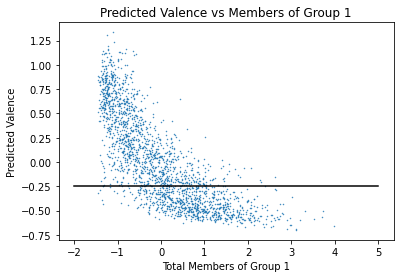

In [508]:
plt.scatter(df['totalGroup1'],preds,s=.2)
y=[-.25,-.25]
x=[-2,5]
plt.plot(x,y,c='black')
plt.title('Predicted Valence vs Members of Group 1')
plt.ylabel('Predicted Valence')
plt.xlabel('Total Members of Group 1')

In [509]:
print('Correlation:',pearsonr(df['totalGroup1'],preds)[0])

Correlation: -0.771433815083651


Text(0.5, 0, 'Total Members of Group 2')

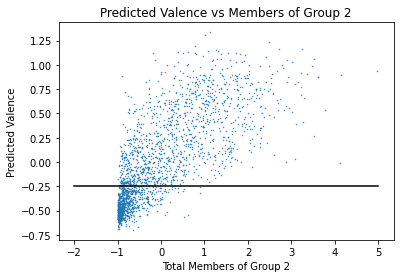

In [510]:
plt.scatter(df['totalGroup2'],preds,s=.2)
y=[-.25,-.25]
x=[-2,5]
plt.plot(x,y,c='black')
plt.title('Predicted Valence vs Members of Group 2')
plt.ylabel('Predicted Valence')
plt.xlabel('Total Members of Group 2')

In [511]:
print('Correlation:',pearsonr(df['totalGroup2'],preds)[0])

Correlation: 0.7492420856775133


In [512]:
X=df[['percent_bachelorPlus','households_meanIncome']]
Y=df['meanvalence']

In [513]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=1234)
X_sm=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_sm)
results=model.fit()
print(results.summary())
X_sm=sm.add_constant(X)
preds2=results.predict(X_sm)

                            OLS Regression Results                            
Dep. Variable:            meanvalence   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     222.8
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           1.43e-86
Time:                        16:50:03   Log-Likelihood:                -2195.0
No. Observations:                1688   AIC:                             4396.
Df Residuals:                    1685   BIC:                             4412.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

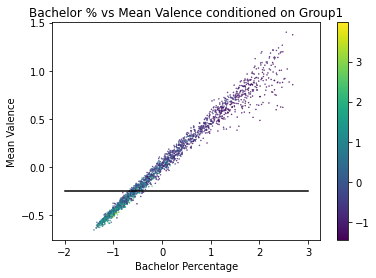

In [514]:
plt.scatter(df['percent_bachelorPlus'],preds2,c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Mean Valence')
plt.title('Bachelor % vs Mean Valence conditioned on Group1')
y=[-.25,-.25]
x=[-2,3]
plt.plot(x,y,c='black')

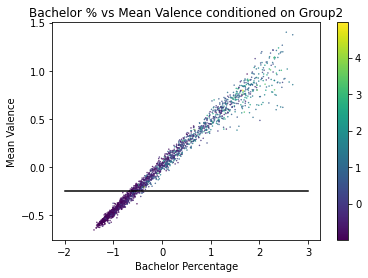

In [515]:
plt.scatter(df['percent_bachelorPlus'],preds2,c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Mean Valence')
plt.title('Bachelor % vs Mean Valence conditioned on Group2')
y=[-.25,-.25]
x=[-2,3]
plt.plot(x,y,c='black')

In [516]:
print('Correlation:',pearsonr(df['percent_bachelorPlus'],preds2)[0])

Correlation: 0.9903049233510416


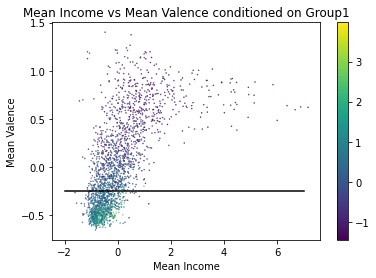

In [517]:
plt.scatter(df['households_meanIncome'],preds2,c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Mean Valence')
plt.title('Mean Income vs Mean Valence conditioned on Group1')
y=[-.25,-.25]
x=[-2,7]
plt.plot(x,y,c='black')

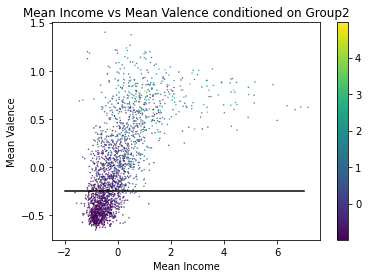

In [518]:
plt.scatter(df['households_meanIncome'],preds2,c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Mean Valence')
plt.title('Mean Income vs Mean Valence conditioned on Group2')
y=[-.25,-.25]
x=[-2,7]
plt.plot(x,y,c='black')

In [519]:
print('Correlation:',pearsonr(df['households_meanIncome'],preds2)[0])

Correlation: 0.654114593766323


Text(0.5, 0, 'Total Members of Group 1')

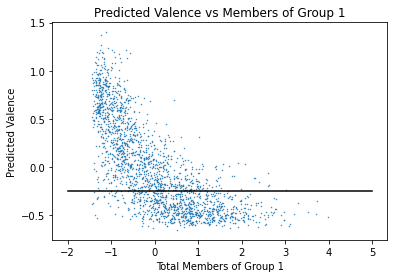

In [520]:
plt.scatter(df['totalGroup1'],preds2,s=.2)
y=[-.25,-.25]
x=[-2,5]
plt.plot(x,y,c='black')
plt.title('Predicted Valence vs Members of Group 1')
plt.ylabel('Predicted Valence')
plt.xlabel('Total Members of Group 1')

In [521]:
print('Correlation:',pearsonr(df['totalGroup1'],preds2)[0])

Correlation: -0.731048301508239


Text(0.5, 0, 'Total Members of Group 2')

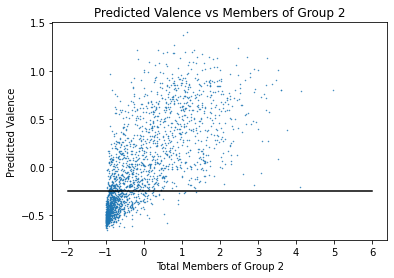

In [522]:
plt.scatter(df['totalGroup2'],preds2,s=.2)
y=[-.25,-.25]
x=[-2,6]
plt.plot(x,y,c='black')
plt.title('Predicted Valence vs Members of Group 2')
plt.ylabel('Predicted Valence')
plt.xlabel('Total Members of Group 2')

In [523]:
print('Correlation:',pearsonr(df['totalGroup2'],preds2)[0])

Correlation: 0.7109529731094517


In [524]:
import scipy

def gen_latent_fast(df0, prot_col, tar_col):
    """
    generate a representation for target column which is independent from
    any columns in prot_col
    df0: a data frame
    prot_col: list of strings, the protected columns
    tar_col: string, the target (outcome) column
    """
    df = df0.copy()
    for column in df.columns:
        df[column] = df[column] - df[column].mean()
    df_protect = df[prot_col]
    dfv_protect = df_protect.values
    dfv_target = df[tar_col].values
    base_protect = scipy.linalg.orth(dfv_protect)
    for i in range(base_protect.shape[1]):
        #print(base_protect[:,i].shape)
        dfv_target = dfv_target - np.inner(dfv_target, base_protect[:,i])*base_protect[:,i]
    return dfv_target

def gen_latent_nonparam_regula(df0, prot_col, tar_col, lbd):
    """
    generate a fair representation at a certain level define by lbd
    df0: a data frame
    prot_col: list of strings, the protected columns
    tar_col: string, the target (outcome) column
    lbd: float number between 0 and 1, 0 means totally fair; 1 means same as outcome
    """

    dfv_target = df0[tar_col].values
    dfv_mean = df0[tar_col].mean()
    dfv_target = dfv_target - dfv_mean

    latent0 = gen_latent_fast(df0, prot_col, tar_col)

    return latent0 + lbd*(dfv_target - latent0)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   2.,
          1.,   2.,   2.,   6.,   7.,   2.,  10.,  19.,  13.,  27.,  40.,
         60.,  75.,  79., 128., 146., 181., 159., 187., 169., 154., 127.,
        116.,  91.,  52.,  59.,  29.,  47.,  31.,  21.,  20.,   9.,  10.,
          9.,   2.,   2.,   4.,   1.,   2.,   1.,   0.,   0.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-7.07705057, -6.90317017, -6.72928977, -6.55540936, -6.38152896,
        -6.20764856, -6.03376816, -5.85988776, -5.68600736, -5.51212695,
        -5.33824655, -5.16436615, -4.99048575, -4.81660535, -4.64272495,
        -4.46884454, -4.29496414, -4.12108374, -3.94720334, -3.77332294,
        -3.59944254, -3.42

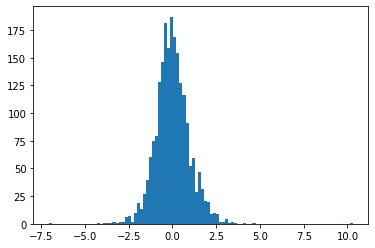

In [525]:
Y=gen_latent_nonparam_regula(df,['totalGroup1','totalGroup2'],'meanvalence',0.1)
Y=scaler.fit_transform(np.array(Y).reshape(-1,1))
plt.hist(Y,bins=100)

In [526]:
count=0
for i in range(len(df)):
    if Y[i]<-.25:
        count+=1
print(count/len(df))

0.4018957345971564


In [527]:
X=df[['totalGroup1','totalGroup2','percent_bachelorPlus','households_meanIncome']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=1234)
X_sm=sm.add_constant(X_train)
model=sm.OLS(Y_train,X_sm)
results=model.fit()
print(results.summary())
X_sm=sm.add_constant(X)
preds3=results.predict(X_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     27.27
Date:                Wed, 24 Mar 2021   Prob (F-statistic):           5.83e-22
Time:                        16:50:09   Log-Likelihood:                -2340.9
No. Observations:                1688   AIC:                             4692.
Df Residuals:                    1683   BIC:                             4719.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.00

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  2.,  1.,
         1.,  5.,  3.,  2.,  8.,  2.,  4.,  7., 10.,  7., 16., 10., 16.,
        23., 21., 24., 30., 41., 43., 42., 48., 54., 57., 63., 54., 65.,
        66., 58., 70., 58., 61., 66., 76., 40., 66., 62., 62., 54., 41.,
        49., 44., 43., 39., 35., 35., 39., 28., 32., 33., 19., 24., 23.,
        25., 16., 18., 23., 23., 15.,  6.,  6., 12., 10.,  8.,  9.,  4.,
         7.,  6.,  5.,  0.,  5.,  2.,  4.,  4.,  3.,  0.,  1.,  0.,  1.,
         0.,  2.,  1.,  0.,  1.,  2.,  3.,  0.,  2.]),
 array([-0.81472292, -0.79708375, -0.77944457, -0.76180539, -0.74416622,
        -0.72652704, -0.70888786, -0.69124869, -0.67360951, -0.65597033,
        -0.63833116, -0.62069198, -0.6030528 , -0.58541363, -0.56777445,
        -0.55013527, -0.5324961 , -0.51485692, -0.49721774, -0.47957857,
        -0.46193939, -0.44430021, -0.42666104, -0.40902186, -0.39138268,
        -0.3737435 , -0.35610433, -0.33846515, -0.32082597, -0.303186

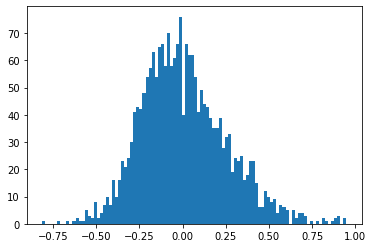

In [528]:
plt.hist(preds3,bins=100)

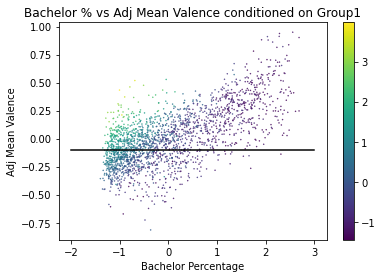

In [529]:
plt.scatter(df['percent_bachelorPlus'],preds3,c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Adj Mean Valence')
plt.title('Bachelor % vs Adj Mean Valence conditioned on Group1')
y=[-.1,-.1]
x=[-2,3]
plt.plot(x,y,c='black')

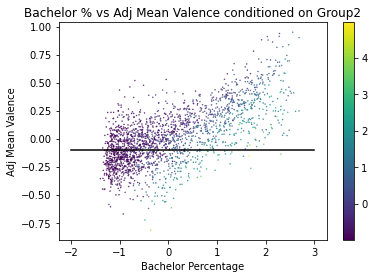

In [530]:
plt.scatter(df['percent_bachelorPlus'],preds3,c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Bachelor Percentage')
plt.ylabel('Adj Mean Valence')
plt.title('Bachelor % vs Adj Mean Valence conditioned on Group2')
y=[-.1,-.1]
x=[-2,3]
plt.plot(x,y,c='black')

In [531]:
print('Correlation:',pearsonr(df['percent_bachelorPlus'],preds3)[0])

Correlation: 0.6702713904891976


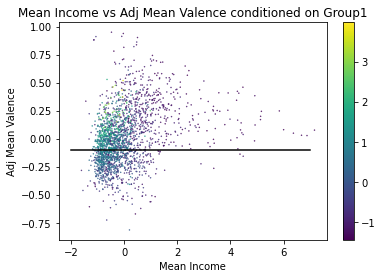

In [532]:
plt.scatter(df['households_meanIncome'],preds3,c=df['totalGroup1'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Adj Mean Valence')
plt.title('Mean Income vs Adj Mean Valence conditioned on Group1')
y=[-.1,-.1]
x=[-2,7]
plt.plot(x,y,c='black')

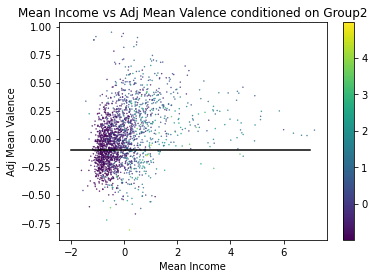

In [533]:
plt.scatter(df['households_meanIncome'],preds3,c=df['totalGroup2'],s=.2)
plt.colorbar()
plt.xlabel('Mean Income')
plt.ylabel('Adj Mean Valence')
plt.title('Mean Income vs Adj Mean Valence conditioned on Group2')
y=[-.1,-.1]
x=[-2,7]
plt.plot(x,y,c='black')

In [534]:
print('Correlation:',pearsonr(df['households_meanIncome'],preds3)[0])

Correlation: 0.32846783870756474


Text(0.5, 0, 'Total Members of Group 1')

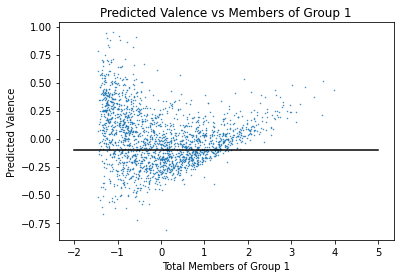

In [535]:
plt.scatter(df['totalGroup1'],preds3,s=.2)
y=[-.1,-.1]
x=[-2,5]
plt.plot(x,y,c='black')
plt.title('Predicted Valence vs Members of Group 1')
plt.ylabel('Predicted Valence')
plt.xlabel('Total Members of Group 1')

In [536]:
print('Correlation:',pearsonr(df['totalGroup1'],preds3)[0])

Correlation: -0.13705250548305078


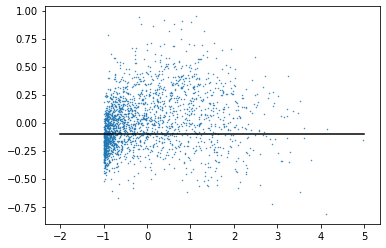

In [537]:
plt.scatter(df['totalGroup2'],preds3,s=.2)
y=[-.1,-.1]
x=[-2,5]
plt.plot(x,y,c='black')

In [538]:
print('Correlation:',pearsonr(df['totalGroup2'],preds3)[0])

Correlation: 0.19319887061862193


In [539]:
count=0
for i in range(len(df)):
    if preds3[i]<-.1:
        count+=1
print(count/len(df))

0.36208530805687206
